In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_regression


In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [4]:
df = pd.read_csv("true_car_listings.csv", sep=',', engine='python', error_bad_lines=False)
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [5]:
# df = df.drop(columns=['City', 'State', 'Vin', 'Id'])
df.head(100)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


In [6]:
df['Make'] = df['Make'].astype('category').cat.codes
df['Vin'] = df['Vin'].astype('category').cat.codes
df['Model'] = df['Model'].astype('category').cat.codes
df['City'] = df['City'].astype('category').cat.codes
df['State'] = df['State'].astype('category').cat.codes
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,646,49,3972,1,1194
1,10888,2013,19606,1260,39,3707,1,1193
2,8995,2013,48851,646,49,3970,1,1194
3,10999,2014,39922,2490,6,3824,1,1193
4,14799,2016,22142,1231,50,42,1,1196


In [7]:
X = df.drop(columns='Price')
y = df['Price']

In [8]:
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.2108964026065293


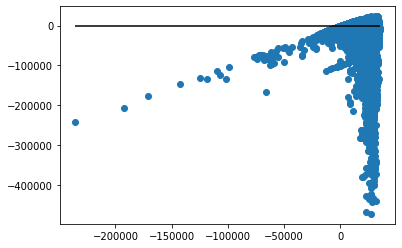

In [27]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()